In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/mushrooms.csv')
df

In [ ]:
df['veil-type'].value_counts()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
mappings = list()
le = LabelEncoder()
for column in range(len(df.columns)):
  df[df.columns[column]] = le.fit_transform(df[df.columns[column]])
  mappings_dict = {index : label for index, label in enumerate(le.classes_)}
  mappings.append(mappings_dict)



In [ ]:
mappings

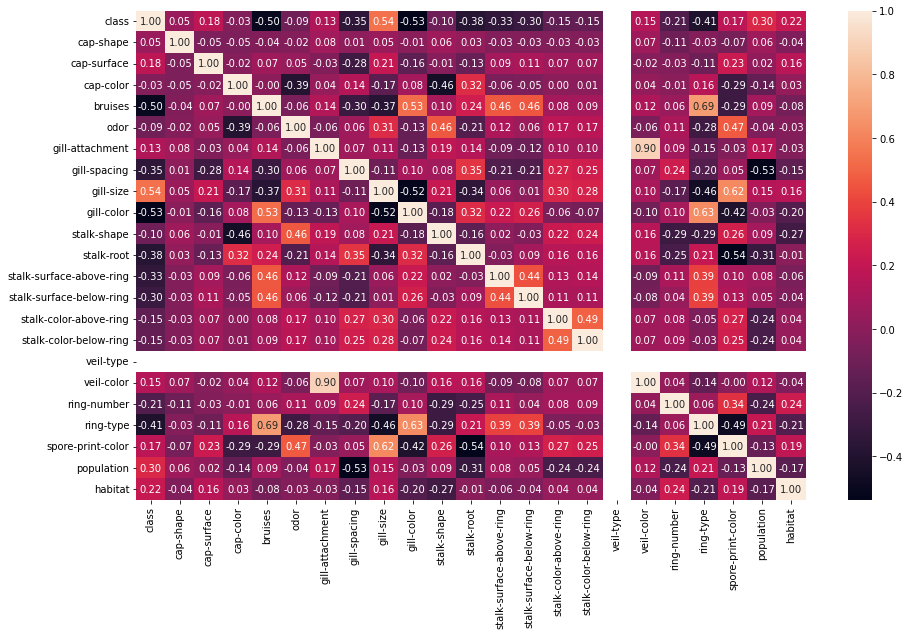

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(method='pearson'), annot = True, fmt='.2f')

In [ ]:
x = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [ ]:
def models (x_train,y_train):
  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train,y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier()
  tree.fit(x_train,y_train)

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier()
  forest.fit(x_train,y_train)

  # SVC
  from sklearn.svm import SVC
  svc = SVC()
  svc.fit(x_train,y_train)

  # KNighbors
  from sklearn.neighbors import KNeighborsClassifier
  kn = KNeighborsClassifier()
  kn.fit(x_train,y_train)

  # XGB
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train,y_train)

  # Neural Network
  from sklearn.neural_network import MLPClassifier
  nt = MLPClassifier()
  nt.fit(x_train,y_train)

  


  print('LR: ', lr.score(x_train,y_train))
  print('DT: ', tree.score(x_train,y_train))
  print('RF: ', forest.score(x_train,y_train))
  print('KN: ', kn.score(x_train,y_train))
  print('XGB: ', xgb.score(x_train,y_train))
  print('MLPC: ', nt.score(x_train,y_train))


  return lr,tree,forest,kn,xgb,nt
  

In [ ]:
model = models(x_train,y_train)

LR:  0.9524043984900705
DT:  1.0
RF:  1.0
KN:  1.0
XGB:  1.0
MLPC:  1.0


In [ ]:
y_pred = model[1].predict(x_test)
print(y_pred)


[0 0 0 ... 0 1 1]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from sklearn.tree import  DecisionTreeClassifier

for i in range(len(model)):
   print('Model', i)
   print('Accuracy:', accuracy_score(y_test, model[i].predict(x_test)))
   print(classification_report(y_test, model[i].predict(x_test)))
   print(confusion_matrix(y_test, model[i].predict(x_test)))
# INI Lanjutan jika harus ada cross validation
# tree = DecisionTreeClassifier()
# tree.fit(x_train,y_train)
# predictions = tree.predict(x_test)
# print('Accuracy:', accuracy_score(y_test, model[i].predict(x_test)))
# print(confusion_matrix(y_test, model[i].predict(x_test)))
# print(classification_report(y_test, model[i].predict(x_test)))


Model 0
Accuracy: 0.9542097488921714
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1069
           1       0.94      0.96      0.95       962

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

[[1013   56]
 [  37  925]]
Model 1
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1069    0]
 [   0  962]]
Model 2
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00    

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1069,    0],
       [   0,  962]])

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import Imputer
# my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', RandomForestRegressor(n_estimators=50,
#                                                               random_state=0))
#                              ])

In [ ]:
# from sklearn.model_selection import cross_val_score

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(my_pipeline, x, y,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

In [ ]:
# print("Average MAE score (across experiments):")
# print(scores.mean())

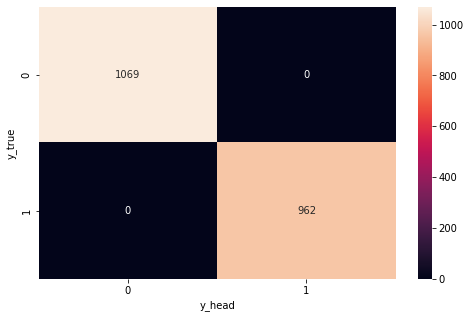

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()